# Tast-2 Prediction using Unsuppervised Machine Learning by using K

## Muhammad Hassan 
## Data Science and Business Analytics at Spark Foundation Network
### Graduate Rotational Internship Program #GRIPOCT21 #GRIPOCTUBER21

### IDE : JupyterNotebook
### Language: Python


## From the given 'iris' dataset, predict the optimum number of clusters and represent it visually

## Libraries Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
# %matplotplib inline

### Read CSV file from PC

In [2]:
df = pd.read_csv('C:/Users/user/iris.csv')

### Showing first 5 rows

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking for null values

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe() # statistical values of numerical columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info() #information of the whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Using heatmap to show the correlation among the variable

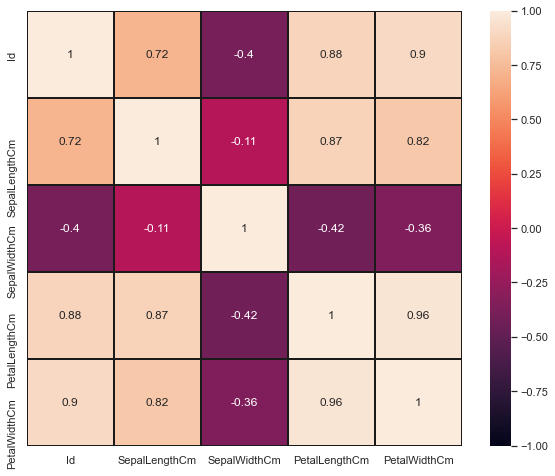

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 8))
fig = sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor='k', square=True, mask=False, vmin = -1,
                 vmax=1,cbar=True);

# Visualization of dataset

In [20]:
df.columns  #columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
df['Species'].value_counts() #Using value to see the three classes values 1. Iris-Setosa 2. Iris-virginica 3. Iris-versicolor

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Visually represent of Species with other classes

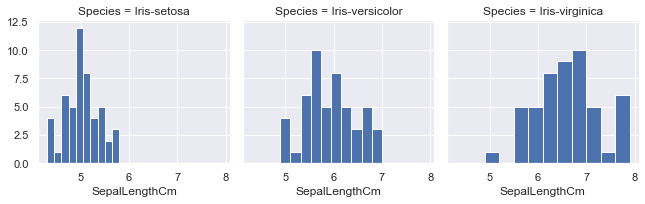

In [22]:
sns.set(style='darkgrid')

b = sns.FacetGrid(df, col='Species')
b.map(plt.hist, 'SepalLengthCm');

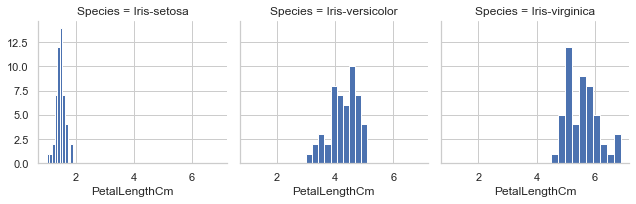

In [23]:
sns.set(style='whitegrid')

c = sns.FacetGrid(df, col='Species')
c.map(plt.hist, 'PetalLengthCm');

## Now pie chart to represent the three classes of Species 

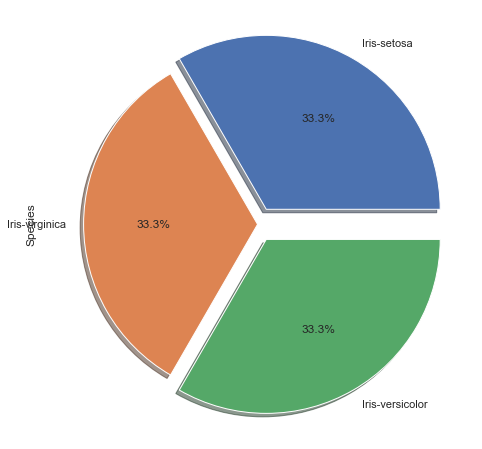

In [25]:
df['Species'].value_counts().plot.pie(explode=[0.1,0,0.1], autopct='%1.1f%%', shadow=True, figsize=(10,8));

In [26]:
df_new = df.iloc[:,1:]  ##Feature selection

In [27]:
df_new.drop('Species', axis=1, inplace=True)  ##Drop the Species columns

In [28]:
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


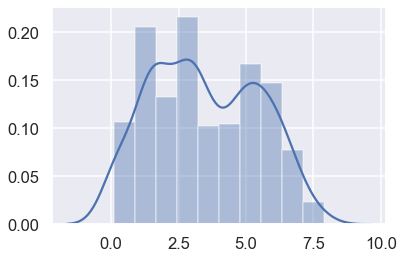

In [29]:
sns.set(style = 'darkgrid')
sns.set_context("talk")
sns.distplot(df_new);

# KMean Clustering

In [30]:
# Standardizing to avoid bias
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df_new)

#To find the optimal no. of cluster
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,141.154178
3,4,114.615507
4,5,91.191970
5,6,80.535209
6,7,72.174266
7,8,63.561127
8,9,54.450949
9,10,47.713850


## Result will represent visually

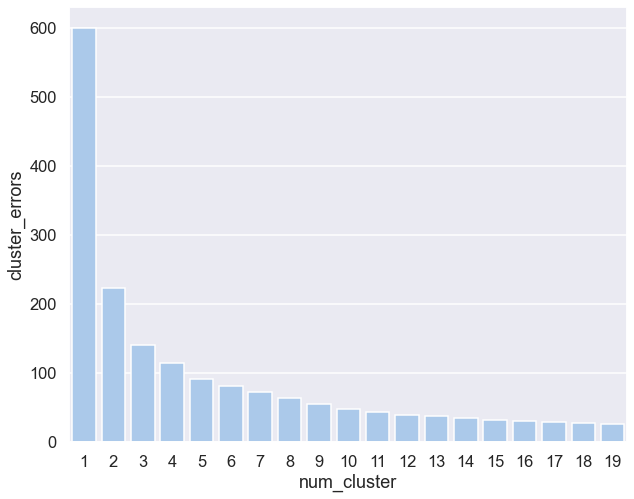

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("pastel")
sns.barplot(x="num_cluster", y="cluster_errors", data=clusters_df, color="b");

## End